# Weather Weighted UTMB Prediction Eval

Evaluating the predictions made using weather weighted UTMB paces. 

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt


%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../../data/weather_pace_predictions.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.589501,11.939618,13.268314,13.268791,13.182445
1,1,Senior Men (23-39),Male,15.088612,13.589501,12.676387,14.406557,14.405696,14.389533
2,2,Masters Men 1 (40-49),Male,16.802140,15.121991,14.413524,15.701139,15.701881,15.564509
3,3,Masters Men 1 (40-49),Male,16.236556,16.326208,14.475365,15.200261,15.200349,14.962338
4,4,Senior Men (23-39),Male,17.313847,17.965522,12.897879,15.722523,15.722237,15.716331


In [4]:
df = df.dropna()

In [5]:
df.sort_values(by = 'weighted_mean')

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
217,217,Senior Men (23-39),Male,7.642793,9.072737,7.918194,8.204064,8.204296,8.206092
974,974,Senior Men (23-39),Male,7.340912,8.641435,7.605435,8.247194,8.247227,8.244154
764,764,Senior Men (23-39),Male,7.450002,8.606394,7.718456,8.250698,8.249334,8.243135
975,975,Senior Men (23-39),Male,8.039194,8.641435,8.254746,8.253326,8.252748,8.278295
676,676,Senior Men (23-39),Male,7.619624,8.156571,7.894190,8.295681,8.295787,8.296183
583,583,Senior Men (23-39),Male,7.461441,7.966542,7.730307,8.314684,8.315214,8.315219
51,51,Senior Men (23-39),Male,7.251072,7.852225,7.445493,8.326115,8.326633,8.325366
763,763,Senior Men (23-39),Male,7.458294,7.824615,7.727047,8.328876,8.329643,8.329761
122,122,Senior Men (23-39),Male,7.316191,7.597568,7.579823,8.351581,8.351977,8.348470
500,500,Senior Men (23-39),Male,7.408082,7.512357,7.762081,8.360102,8.360504,8.357738


# All

In [6]:
abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_average_pace))
aweightpb = sqrt(mean_squared_error(df.query_pb, df.weighted_mean))
aeucpb = sqrt(mean_squared_error(df.query_pb, df.euc_weighted_mean))

print('Best Error:', abestpb)
print('Mean Error:', ameanpb)
print('Weighted Mean:', aweightpb)
print('Euclidean Weighted Mean:', aeucpb)


Best Error: 1.7388443489693393
Mean Error: 1.1285620229556508
Weighted Mean: 1.1284078179878558
Euclidean Weighted Mean: 1.12227049171231


# Male

In [7]:
male = df[df.gender == 'Male']

In [8]:


mbestpb = sqrt(mean_squared_error(male.query_pb, male.best_pb_prediction))
mmeanpb = sqrt(mean_squared_error(male.query_pb, male.mean_pb_average_pace))
mweightpb = sqrt(mean_squared_error(male.query_pb, male.weighted_mean))
meucpb = sqrt(mean_squared_error(male.query_pb, male.euc_weighted_mean))

print('Male Best Error:', mbestpb)
print('Male Mean Error:', mmeanpb)
print('Male Weighted Mean Error:', mweightpb)
print('Male Euclidean Weighted Mean Error:', meucpb)

Male Best Error: 1.7480423474698012
Male Mean Error: 1.1300991990942297
Male Weighted Mean Error: 1.1301365299273363
Male Euclidean Weighted Mean Error: 1.1244139977906205


# Female

In [9]:
female = df[df.gender == 'Female']

In [10]:

fbestpb = sqrt(mean_squared_error(female.query_pb, female.best_pb_prediction))
fmeanpb = sqrt(mean_squared_error(female.query_pb, female.mean_pb_average_pace))
fweightpb = sqrt(mean_squared_error(female.query_pb, female.weighted_mean))
feucpb = sqrt(mean_squared_error(female.query_pb, female.euc_weighted_mean))

print('Female Best Error:', fbestpb)
print('Female Mean Error:', fmeanpb)
print('Female Weighted Mean Error', fweightpb)
print('Female Euclidean Weighted Mean Error:', feucpb)

Female Best Error: 1.6372519292761134
Female Mean Error: 1.1119904178998197
Female Weighted Mean Error 1.1097523976034984
Female Euclidean Weighted Mean Error: 1.0990862199128497


In [11]:
mean = [ameanpb, mmeanpb, fmeanpb ]
best = [abestpb, mbestpb, fbestpb]
w_mean = [aweightpb, mweightpb, fweightpb]
euc_mean =[aeucpb, meucpb, feucpb]

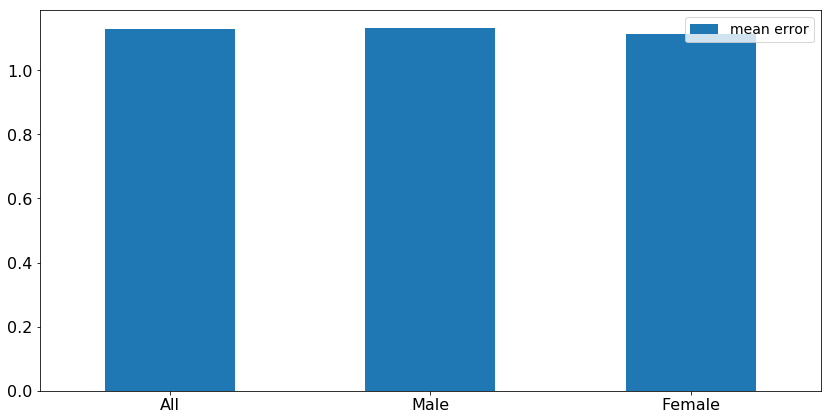

In [12]:
index = ['All', 'Male',  'Female']
gra = pd.DataFrame({'mean error': mean}, index=index)
ax = gra.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

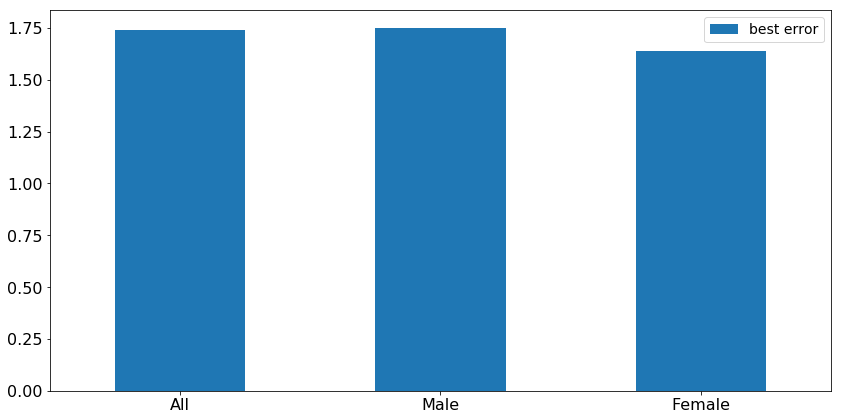

In [13]:
index = ['All', 'Male', 'Female']
gra2 = pd.DataFrame({'best error': best}, index=index)
ax = gra2.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

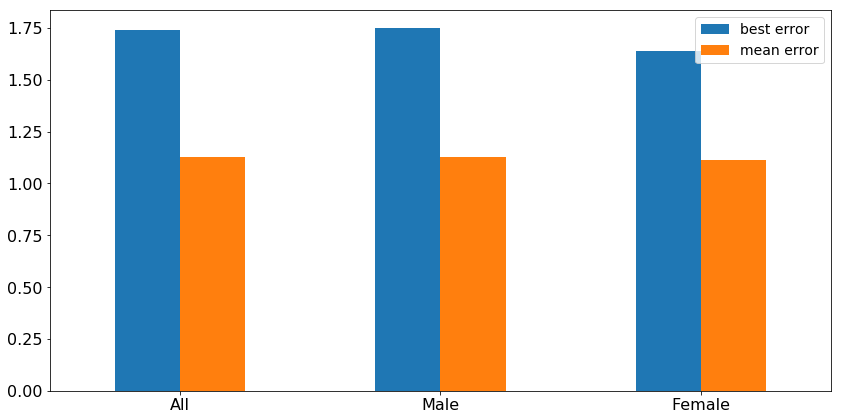

In [14]:
index = ['All', 'Male', 'Female']
gra1 = pd.DataFrame({'mean error': mean, 'best error': best}, index=index)
ax = gra1.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

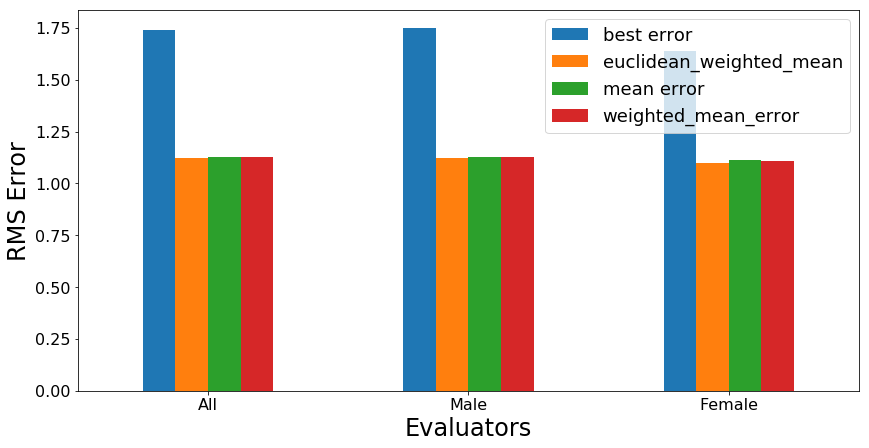

In [15]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'mean error': mean, 'best error': best, 'weighted_mean_error': w_mean, 'euclidean_weighted_mean': euc_mean}, index=index)
ax = gra_w.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.set_ylabel('RMS Error', fontsize = 24)
ax.set_xlabel('Evaluators', fontsize = 24)
ax.legend(fontsize = 18)

In [16]:
mean

[1.1285620229556508, 1.1300991990942297, 1.1119904178998197]

# Categories

In [17]:
sen = df[df.category == 'Senior Men (23-39)']

mas = df[df.category == 'Masters Men 1 (40-49)']

mas2 = df[df.category == 'Masters Men 2 (50-59)']

mas3 = df[df.category == 'Masters Men 3 (60-69)']

wom1 = df[df.category == 'Masters Women 1 (40-49)']

wom2 = df[df.category == 'Masters Women 2 (50-59)']

senW = df[df.category == 'Senior Women (23-39)']

you = df[df.category == 'Youth Men (20-22)']

In [18]:

snrB = sqrt(mean_squared_error(sen.query_pb, sen.best_pb_prediction))
snrM = sqrt(mean_squared_error(sen.query_pb, sen.mean_pb_average_pace))
snrw = sqrt(mean_squared_error(sen.query_pb, sen.weighted_mean))
snrE = sqrt(mean_squared_error(sen.query_pb, sen.euc_weighted_mean))

mas1B = sqrt(mean_squared_error(mas.query_pb, mas.best_pb_prediction))
mas1M = sqrt(mean_squared_error(mas.query_pb, mas.mean_pb_average_pace))
mas1BW = sqrt(mean_squared_error(mas.query_pb, mas.weighted_mean))
mas1ME = sqrt(mean_squared_error(mas.query_pb, mas.euc_weighted_mean))

mas2B = sqrt(mean_squared_error(mas2.query_pb, mas2.best_pb_prediction))
mas2M = sqrt(mean_squared_error(mas2.query_pb, mas2.mean_pb_average_pace))

mas3B = sqrt(mean_squared_error(mas3.query_pb, mas3.best_pb_prediction))
mas3M = sqrt(mean_squared_error(mas3.query_pb, mas3.mean_pb_average_pace))

wom1B = sqrt(mean_squared_error(wom1.query_pb, wom1.best_pb_prediction))
wom1M = sqrt(mean_squared_error(wom1.query_pb, wom1.mean_pb_average_pace))

wom2B = sqrt(mean_squared_error(wom2.query_pb, wom2.best_pb_prediction))
wom2M = sqrt(mean_squared_error(wom2.query_pb, wom2.mean_pb_average_pace))

senWB = sqrt(mean_squared_error(senW.query_pb, senW.best_pb_prediction))
senWM = sqrt(mean_squared_error(senW.query_pb, senW.mean_pb_average_pace))


print('Senior Men Best Error:', snrB)
print('Senior Men Mean Error:', snrM)
print('Master 1 Best Error:', mas1B)
print('Master 1 Mean Error:', mas1M)
print('Master 2 Best Error:', mas2B)
print('Master 2 Mean Error:', mas2M)
print('Master 3 Best Error:', mas3B)
print('Master 3 Mean Error:', mas3M)
print('Master Women 1 Best Error:', wom1B)
print('Master Women 1 Mean Error:', wom1M)
print('Master Women 2 Best Error:', wom2B)
print('Master Women 2 Mean Error:', wom2M)
print('Senior Women Best Error:', senWB)
print('Senior Women Mean Error:', senWM)


Senior Men Best Error: 1.9371763255766423
Senior Men Mean Error: 1.2655697423376764
Master 1 Best Error: 1.607729347893493
Master 1 Mean Error: 1.030749720671661
Master 2 Best Error: 1.7785168501782538
Master 2 Mean Error: 1.134809830111987
Master 3 Best Error: 0.9677911016369123
Master 3 Mean Error: 0.789022950940579
Master Women 1 Best Error: 1.2374974717506444
Master Women 1 Mean Error: 0.9914443042846331
Master Women 2 Best Error: 2.5860135187165443
Master Women 2 Mean Error: 1.5341274048407985
Senior Women Best Error: 1.661620752715169
Senior Women Mean Error: 1.1102527118903533


In [19]:
mean1 = [snrM, mas1M, mas2M, mas3M, wom1M, wom2M, senWM]
best1 = [snrB, mas1B, mas2B, mas3B, wom1B, wom2B, senWB]

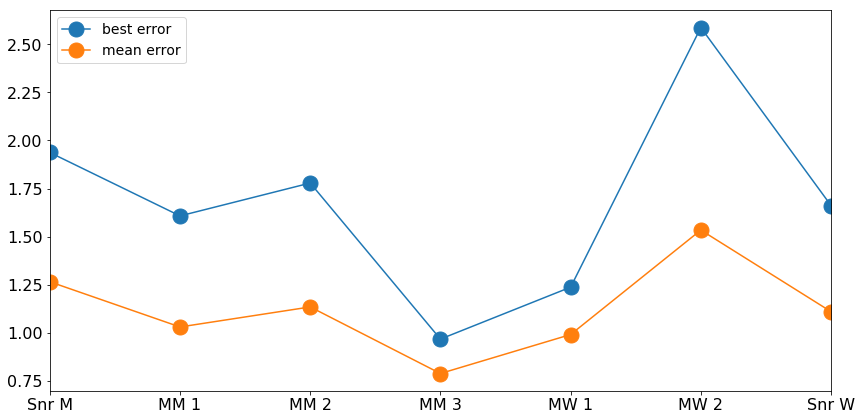

In [20]:
index = ['Snr M', 'MM 1', 'MM 2', 'MM 3', 'MW 1', 'MW 2', 'Snr W']
gra3 = pd.DataFrame({'mean error': mean1, 'best error': best1}, index=index)
ax = gra3.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Ability

In [21]:
g9 = df[(df.query_pb <= 9)]
g11 = df[(df.query_pb > 9) & (df.query_pb <= 11)]
g13 = df[(df.query_pb > 11) & (df.query_pb <= 13)]
g15 = df[(df.query_pb > 13) & (df.query_pb <= 15)]
g17 = df[(df.query_pb > 15) & (df.query_pb <= 17)]
g19 = df[(df.query_pb > 17)]

## Bin counts

In [22]:
g9count = g9.shape[0]
g11count = g11.shape[0]
g13count = g13.shape[0]
g15count = g15.shape[0]
g17count = g17.shape[0]
g19count = g19.shape[0]

In [23]:
count = [g9count, g11count, g13count, g15count, g17count, g19count]

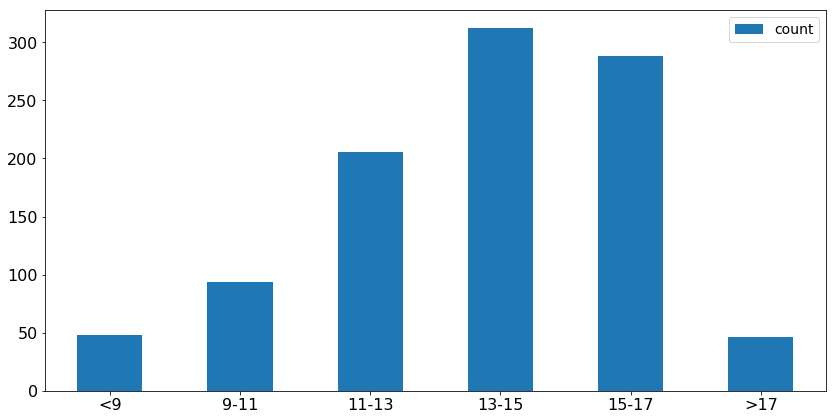

In [24]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [25]:

g9B = sqrt(mean_squared_error(g9.query_pb, g9.best_pb_prediction))
g9M = sqrt(mean_squared_error(g9.query_pb, g9.mean_pb_average_pace))
g9W = sqrt(mean_squared_error(g9.query_pb, g9.weighted_mean))
g9E = sqrt(mean_squared_error(g9.query_pb, g9.euc_weighted_mean))

g11B = sqrt(mean_squared_error(g11.query_pb, g11.best_pb_prediction))
g11M = sqrt(mean_squared_error(g11.query_pb, g11.mean_pb_average_pace))
g11W = sqrt(mean_squared_error(g11.query_pb, g11.weighted_mean))
g11E = sqrt(mean_squared_error(g11.query_pb, g11.euc_weighted_mean))

g13B = sqrt(mean_squared_error(g13.query_pb, g13.best_pb_prediction))
g13M = sqrt(mean_squared_error(g13.query_pb, g13.mean_pb_average_pace))
g13W = sqrt(mean_squared_error(g13.query_pb, g13.weighted_mean))
g13E = sqrt(mean_squared_error(g13.query_pb, g13.euc_weighted_mean))

g15B = sqrt(mean_squared_error(g15.query_pb, g15.best_pb_prediction))
g15M = sqrt(mean_squared_error(g15.query_pb, g15.mean_pb_average_pace))
g15W = sqrt(mean_squared_error(g15.query_pb, g15.weighted_mean))
g15E = sqrt(mean_squared_error(g15.query_pb, g15.euc_weighted_mean))

g17B = sqrt(mean_squared_error(g17.query_pb, g17.best_pb_prediction))
g17M = sqrt(mean_squared_error(g17.query_pb, g17.mean_pb_average_pace))
g17W = sqrt(mean_squared_error(g17.query_pb, g17.weighted_mean))
g17E = sqrt(mean_squared_error(g17.query_pb, g17.euc_weighted_mean))

g19B = sqrt(mean_squared_error(g19.query_pb, g19.best_pb_prediction))
g19M = sqrt(mean_squared_error(g19.query_pb, g19.mean_pb_average_pace))
g19W = sqrt(mean_squared_error(g19.query_pb, g19.weighted_mean))
g19E = sqrt(mean_squared_error(g19.query_pb, g19.euc_weighted_mean))


print('U9 Best Error:', g9B)
print('U9 Mean Error:', g9M)
print('9-11 Best Error:', g11B)
print('9-11 Mean Error:', g11M)
print('11-13 Best Error:', g13B)
print('11-13 Mean Error:', g13M)
print('13-15 Best Error:', g15B)
print('13-15 Mean Error:', g15M)
print('15-17 Best Error:', g17B)
print('15-17 Mean Error:', g17M)
print('O17 Best Error:', g19B)
print('017 Mean Error:', g19M)

U9 Best Error: 1.1480779527947882
U9 Mean Error: 1.3395242103355334
9-11 Best Error: 1.18885777725824
9-11 Mean Error: 1.2315977537886478
11-13 Best Error: 1.2476844891974697
11-13 Mean Error: 1.3103497256486185
13-15 Best Error: 1.4945296325088062
13-15 Mean Error: 0.9695558888652922
15-17 Best Error: 2.115990487989074
15-17 Mean Error: 0.9159433889798217
O17 Best Error: 3.3042916769727686
017 Mean Error: 1.7978533532485401


In [26]:
mean2 = [g9M, g11M, g13M, g15M, g17M, g19M]
best2 = [g9B, g11B, g13B, g15B, g17B, g19B]
wei2 = [g9W, g11W, g13W, g15W, g17W, g19W]
euc2 = [g9E, g11E, g13E, g15E, g17E, g19E]

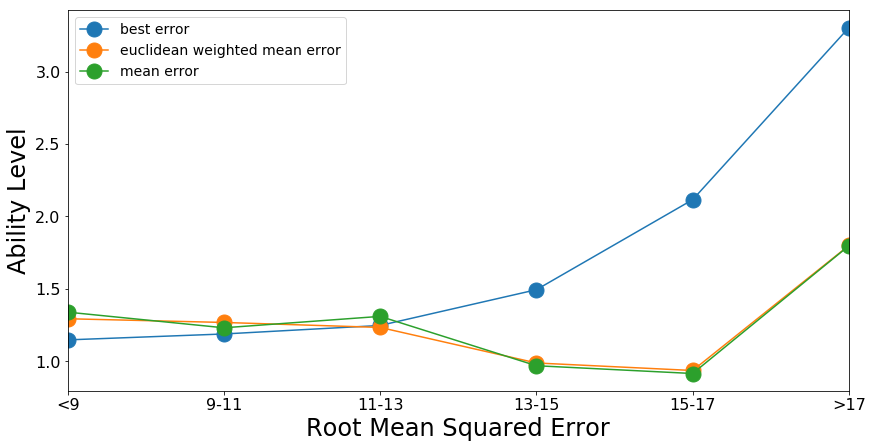

In [27]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra4 = pd.DataFrame({'mean error': mean2, 'best error': best2, 'euclidean weighted mean error': euc2}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Ability Level', fontsize = 24)
ax.set_xlabel('Root Mean Squared Error', fontsize = 24)
ax.legend(fontsize = 14)

# Male Ability

In [28]:
maleg9 = male[(male.query_pb <= 9)]
maleg11 = male[(male.query_pb > 9) & (male.query_pb <= 11)]
maleg13 = male[(male.query_pb > 11) & (male.query_pb <= 13)]
maleg15 = male[(male.query_pb > 13) & (male.query_pb <= 15)]
maleg17 = male[(male.query_pb > 15) & (male.query_pb <= 17)]
maleg19 = male[(male.query_pb > 17)]

## Bin counts

In [29]:
maleg9count = maleg9.shape[0]
maleg11count = maleg11.shape[0]
maleg13count = maleg13.shape[0]
maleg15count = maleg15.shape[0]
maleg17count = maleg17.shape[0]
maleg19count = maleg19.shape[0]

In [30]:
count1 = [maleg9count, maleg11count, maleg13count, maleg15count, maleg17count, maleg19count]

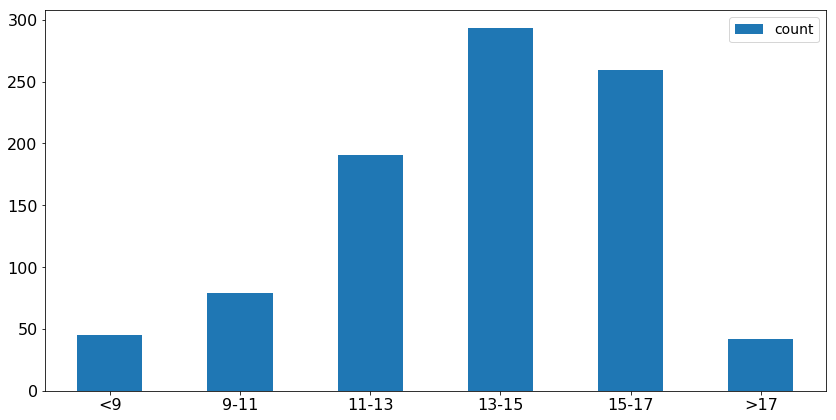

In [31]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra8 = pd.DataFrame({'count': count1}, index=index)
ax = gra8.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [32]:


maleg9B = sqrt(mean_squared_error(maleg9.query_pb, maleg9.best_pb_prediction))
maleg9M = sqrt(mean_squared_error(maleg9.query_pb, maleg9.mean_pb_average_pace))

maleg11B = sqrt(mean_squared_error(maleg11.query_pb, maleg11.best_pb_prediction))
maleg11M = sqrt(mean_squared_error(maleg11.query_pb, maleg11.mean_pb_average_pace))

maleg13B = sqrt(mean_squared_error(maleg13.query_pb, maleg13.best_pb_prediction))
maleg13M = sqrt(mean_squared_error(maleg13.query_pb, maleg13.mean_pb_average_pace))

maleg15B = sqrt(mean_squared_error(maleg15.query_pb, maleg15.best_pb_prediction))
maleg15M = sqrt(mean_squared_error(maleg15.query_pb, maleg15.mean_pb_average_pace))

maleg17B = sqrt(mean_squared_error(maleg17.query_pb, maleg17.best_pb_prediction))
maleg17M = sqrt(mean_squared_error(maleg17.query_pb, maleg17.mean_pb_average_pace))

maleg19B = sqrt(mean_squared_error(maleg19.query_pb, maleg19.best_pb_prediction))
maleg19M = sqrt(mean_squared_error(maleg19.query_pb, maleg19.mean_pb_average_pace))

maleg9W = sqrt(mean_squared_error(maleg9.query_pb, maleg9.weighted_mean))
maleg9E = sqrt(mean_squared_error(maleg9.query_pb, maleg9.euc_weighted_mean))

maleg11W = sqrt(mean_squared_error(maleg11.query_pb, maleg11.weighted_mean))
maleg11E = sqrt(mean_squared_error(maleg11.query_pb, maleg11.euc_weighted_mean))

maleg13W = sqrt(mean_squared_error(maleg13.query_pb, maleg13.weighted_mean))
maleg13E = sqrt(mean_squared_error(maleg13.query_pb, maleg13.euc_weighted_mean))

maleg15W = sqrt(mean_squared_error(maleg15.query_pb, maleg15.weighted_mean))
maleg15E = sqrt(mean_squared_error(maleg15.query_pb, maleg15.euc_weighted_mean))

maleg17W = sqrt(mean_squared_error(maleg17.query_pb, maleg17.weighted_mean))
maleg17E = sqrt(mean_squared_error(maleg17.query_pb, maleg17.euc_weighted_mean))

maleg19W = sqrt(mean_squared_error(maleg19.query_pb, maleg19.weighted_mean))
maleg19E = sqrt(mean_squared_error(maleg19.query_pb, maleg19.euc_weighted_mean))


print('Male U9 Best Error:', maleg9B)
print('Male U9 Mean Error:', maleg9M)
print('Male 9-11 Best Error:', maleg11B)
print('Male 9-11 Mean Error:', maleg11M)
print('Male 11-13 Best Error:', maleg13B)
print('Male 11-13 Mean Error:', maleg13M)
print('Male 13-15 Best Error:', maleg15B)
print('Male 13-15 Mean Error:', maleg15M)
print('Male 15-17 Best Error:', maleg17B)
print('Male 15-17 Mean Error:', maleg17M)
print('Male O17 Best Error:', maleg19B)
print('Male 017 Mean Error:', maleg19M)

Male U9 Best Error: 1.1751646618651095
Male U9 Mean Error: 1.355284039644794
Male 9-11 Best Error: 1.22511754064287
Male 9-11 Mean Error: 1.2726001418696913
Male 11-13 Best Error: 1.1904221243401272
Male 11-13 Mean Error: 1.2845893187179847
Male 13-15 Best Error: 1.4971934587676536
Male 13-15 Mean Error: 0.9656539075605499
Male 15-17 Best Error: 2.140348016640559
Male 15-17 Mean Error: 0.9253361108696004
Male O17 Best Error: 3.3908681660508515
Male 017 Mean Error: 1.8266516038255058


In [33]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
wei3 = [maleg9W, maleg11W, maleg13W, maleg15W, maleg17W, maleg19W]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

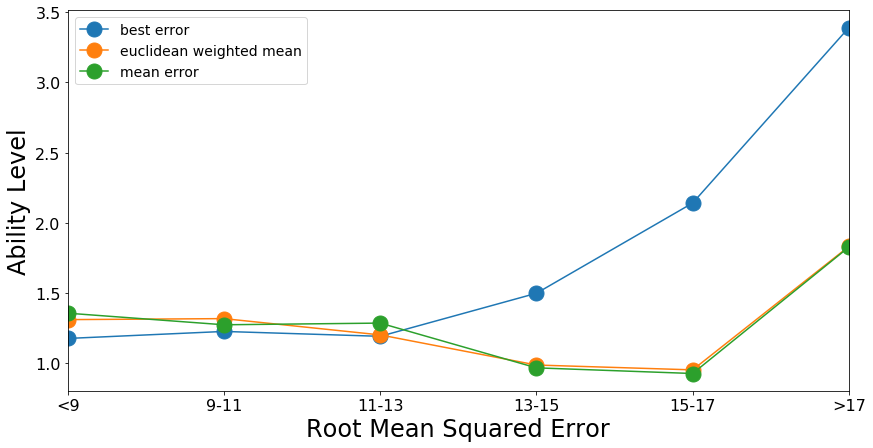

In [34]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'mean error': mean3, 'best error': best3,  'euclidean weighted mean': euc3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Ability Level', fontsize = 24)
ax.set_xlabel('Root Mean Squared Error', fontsize = 24)
ax.legend(fontsize = 14)

# Female Ability

In [35]:
femaleg9 = female[(female.query_pb <= 9)]
femaleg11 = female[(female.query_pb > 9) & (female.query_pb <= 11)]
femaleg13 = female[(female.query_pb > 11) & (female.query_pb <= 13)]
femaleg15 = female[(female.query_pb > 13) & (female.query_pb <= 15)]
femaleg17 = female[(female.query_pb > 15) & (female.query_pb <= 17)]
femaleg19 = female[(female.query_pb > 17)]

## Bin counts

In [36]:
femaleg9count = femaleg9.shape[0]
femaleg11count = femaleg11.shape[0]
femaleg13count = femaleg13.shape[0]
femaleg15count = femaleg15.shape[0]
femaleg17count = femaleg17.shape[0]
femaleg19count = femaleg19.shape[0]

In [37]:
count1 = [femaleg9count, femaleg11count, femaleg13count, femaleg15count, femaleg17count, femaleg19count]

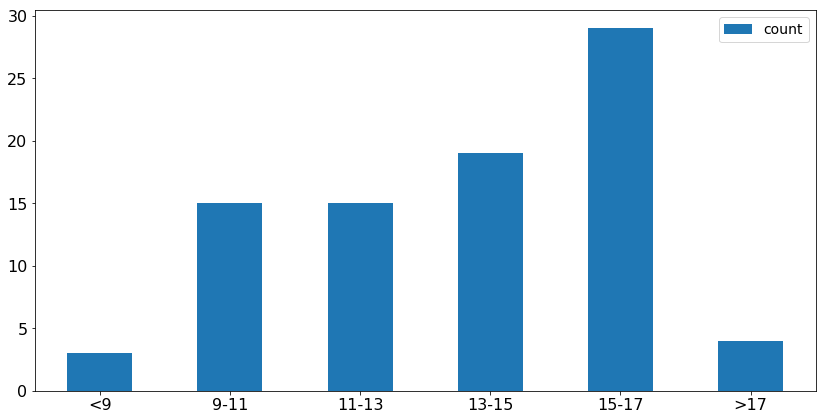

In [38]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'count': count1}, index=index)
ax = gra9.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [39]:


femaleg9B = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.best_pb_prediction))
femaleg9M = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.mean_pb_average_pace))

femaleg11B = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.best_pb_prediction))
femaleg11M = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.mean_pb_average_pace))

femaleg13B = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.best_pb_prediction))
femaleg13M = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.mean_pb_average_pace))

femaleg15B = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.best_pb_prediction))
femaleg15M = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.mean_pb_average_pace))

femaleg17B = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.best_pb_prediction))
femaleg17M = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.mean_pb_average_pace))

femaleg19B = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.best_pb_prediction))
femaleg19M = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.mean_pb_average_pace))

femaleg9W = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.weighted_mean))
femaleg9E = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.euc_weighted_mean))

femaleg11W = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.weighted_mean))
femaleg11E = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.euc_weighted_mean))

femaleg13W = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.weighted_mean))
femaleg13E = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.euc_weighted_mean))

femaleg15W = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.weighted_mean))
femaleg15E = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.euc_weighted_mean))

femaleg17W = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.weighted_mean))
femaleg17E = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.euc_weighted_mean))

femaleg19W = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.weighted_mean))
femaleg19E = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.euc_weighted_mean))


print('female U9 Best Error:', femaleg9B)
print('female U9 Mean Error:', femaleg9M)
print('female 9-11 Best Error:', femaleg11B)
print('female 9-11 Mean Error:', femaleg11M)
print('female 11-13 Best Error:', femaleg13B)
print('female 11-13 Mean Error:', femaleg13M)
print('female 13-15 Best Error:', femaleg15B)
print('female 13-15 Mean Error:', femaleg15M)
print('female 15-17 Best Error:', femaleg17B)
print('female 15-17 Mean Error:', femaleg17M)
print('female O17 Best Error:', femaleg19B)
print('female 017 Mean Error:', femaleg19M)

female U9 Best Error: 0.6116764125315749
female U9 Mean Error: 1.0757691850308222
female 9-11 Best Error: 0.975904998265028
female 9-11 Mean Error: 0.987958365689801
female 11-13 Best Error: 1.8260447805328286
female 11-13 Mean Error: 1.6025596822903514
female 13-15 Best Error: 1.4528323422900662
female 13-15 Mean Error: 1.0278547275459209
female 15-17 Best Error: 1.8845425664639408
female 15-17 Mean Error: 0.8273411559270257
female O17 Best Error: 2.198200955268466
female 017 Mean Error: 1.4616062941464991


In [40]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
wei4 = [femaleg9W, femaleg11W, femaleg13W, femaleg15W, femaleg17W, femaleg19W]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

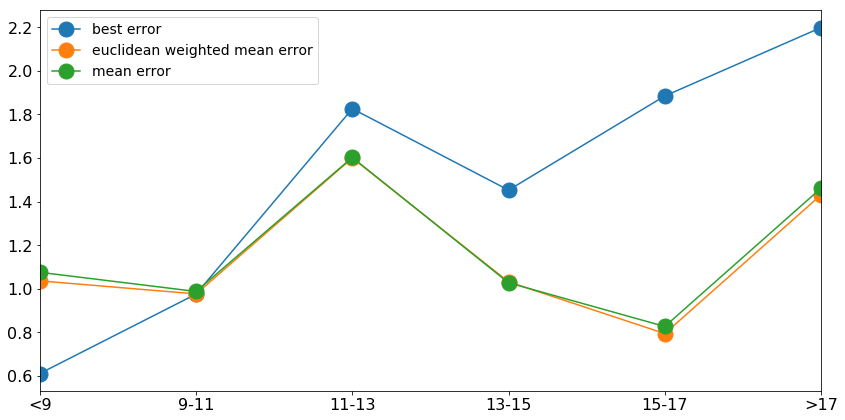

In [41]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'mean error': mean4, 'best error': best4, 'euclidean weighted mean error': euc4}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

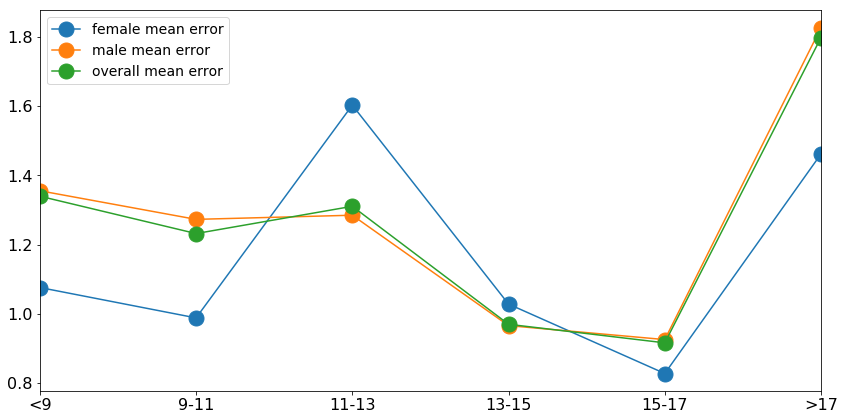

In [42]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'female mean error': mean4, 'male mean error': mean3, 'overall mean error': mean2}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

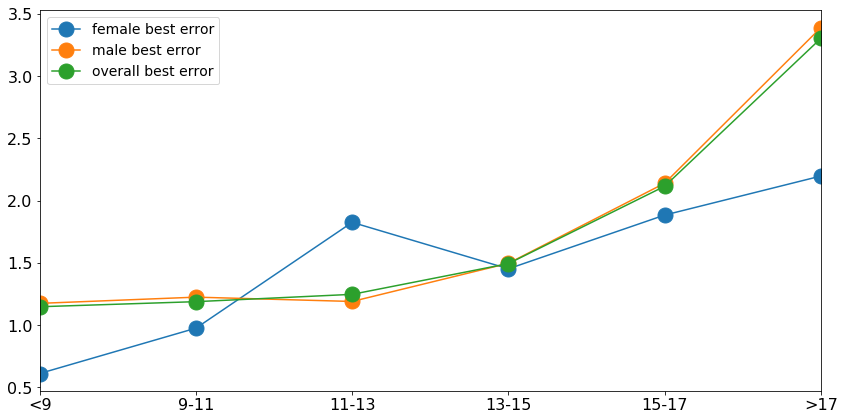

In [43]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra10 = pd.DataFrame({'female best error': best4, 'male best error': best3, 'overall best error': best2}, index=index)
ax = gra10.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Males vs Females

In [44]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

In [45]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

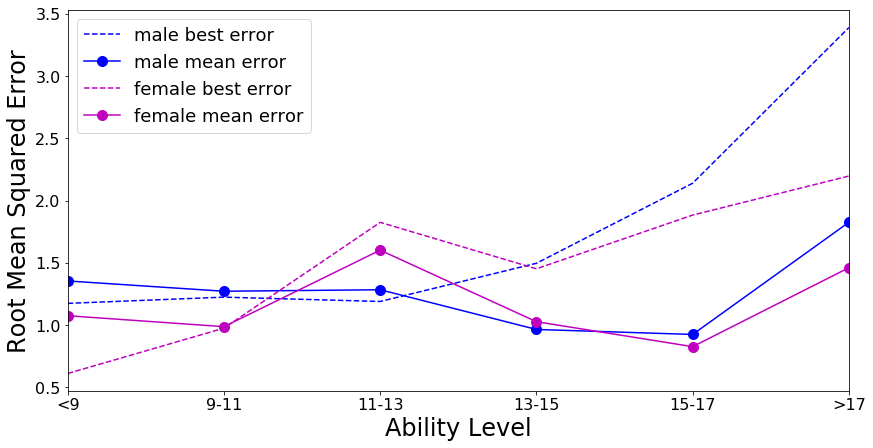

In [46]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male mean error': mean3, 'male best error': best3}, index=index)
gra15 = pd.DataFrame({'female mean error': mean4, 'female best error': best4}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra5.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
gra15.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 18)
#testdataframe2.plot(style=styles2, ax=ax)

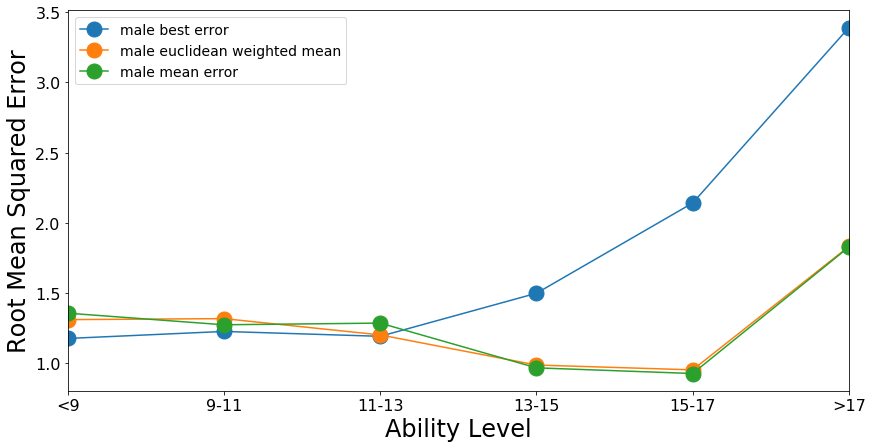

In [47]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male mean error': mean3, 'male best error': best3,  'male euclidean weighted mean': euc3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 14)

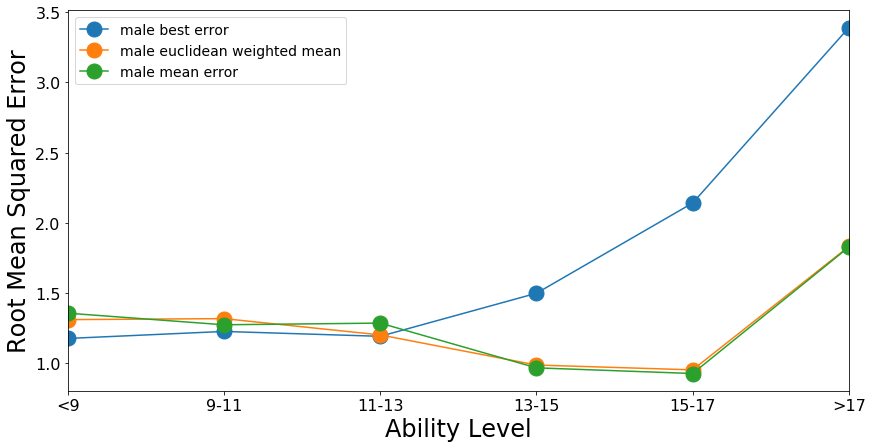

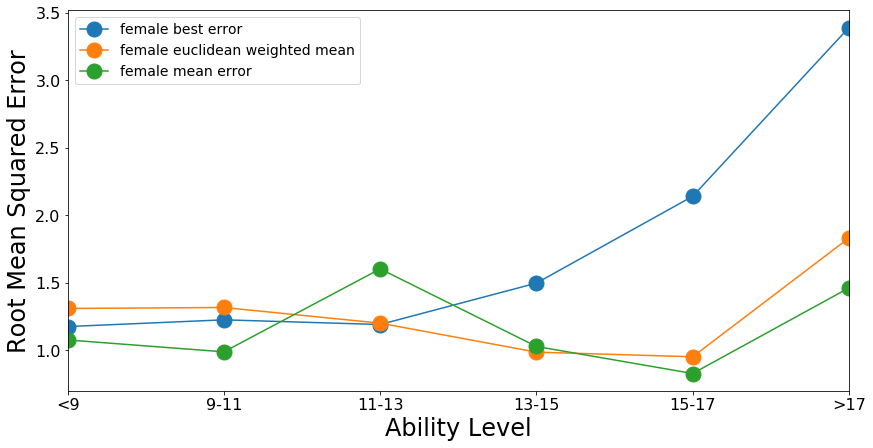

In [48]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male mean error': mean3, 'male best error': best3,  'male euclidean weighted mean': euc3}, index=index)
styles = ['bs-','ro-','y^-']
linewidths = [2, 1, 4]
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 14)
gra15 = pd.DataFrame({'female mean error': mean4, 'female best error': best3,  'female euclidean weighted mean': euc3}, index=index)
ax1 = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax1.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax1.set_xlabel('Ability Level', fontsize = 24)
ax1.legend(fontsize = 14)

# Categorical Ability

## Senior Men Ability

In [51]:
sg9 = sen[(sen.query_pb <= 9)]
sg11 = sen[(sen.query_pb > 9) & (sen.query_pb <= 11)]
sg13 = sen[(sen.query_pb > 11) & (sen.query_pb <= 13)]
sg15 = sen[(sen.query_pb > 13) & (sen.query_pb <= 15)]
sg17 = sen[(sen.query_pb > 15) & (sen.query_pb <= 17)]
sg19 = sen[(sen.query_pb > 17)]

### Bin counts

In [52]:
sg9count = sg9.shape[0]
sg11count = sg11.shape[0]
sg13count = sg13.shape[0]
sg15count = sg15.shape[0]
sg17count = sg17.shape[0]
sg19count = sg19.shape[0]

In [53]:
count2 = [sg9count, sg11count, sg13count, sg15count, sg17count, sg19count]

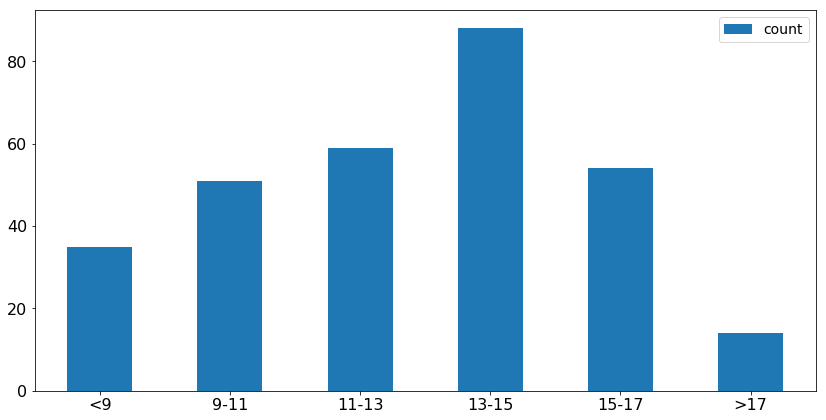

In [54]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count2}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [55]:


sg9B = sqrt(mean_squared_error(sg9.query_pb, sg9.best_pb_prediction))
sg9M = sqrt(mean_squared_error(sg9.query_pb, sg9.mean_pb_average_pace))

sg11B = sqrt(mean_squared_error(sg11.query_pb, sg11.best_pb_prediction))
sg11M = sqrt(mean_squared_error(sg11.query_pb, sg11.mean_pb_average_pace))

sg13B = sqrt(mean_squared_error(sg13.query_pb, sg13.best_pb_prediction))
sg13M = sqrt(mean_squared_error(sg13.query_pb, sg13.mean_pb_average_pace))

sg15B = sqrt(mean_squared_error(sg15.query_pb, sg15.best_pb_prediction))
sg15M = sqrt(mean_squared_error(sg15.query_pb, sg15.mean_pb_average_pace))

sg17B = sqrt(mean_squared_error(sg17.query_pb, sg17.best_pb_prediction))
sg17M = sqrt(mean_squared_error(sg17.query_pb, sg17.mean_pb_average_pace))

sg19B = sqrt(mean_squared_error(sg19.query_pb, sg19.best_pb_prediction))
sg19M = sqrt(mean_squared_error(sg19.query_pb, sg19.mean_pb_average_pace))


print('Sen U9 Best Error:', sg9B)
print('Sen U9 Mean Error:', sg9M)
print('Sen 9-11 Best Error:', sg11B)
print('Sen 9-11 Mean Error:', sg11M)
print('Sen 11-13 Best Error:', sg13B)
print('Sen 11-13 Mean Error:', sg13M)
print('Sen 13-15 Best Error:', sg15B)
print('Sen 13-15 Mean Error:', sg15M)
print('Sen 15-17 Best Error:', sg17B)
print('Sen 15-17 Mean Error:', sg17M)
print('Sen O17 Best Error:', sg19B)
print('Sen 017 Mean Error:', sg19M)

Sen U9 Best Error: 1.3162168250317576
Sen U9 Mean Error: 1.4950056469736044
Sen 9-11 Best Error: 1.3033282252582405
Sen 9-11 Mean Error: 1.3075172167000964
Sen 11-13 Best Error: 1.447606033662418
Sen 11-13 Mean Error: 1.4869672376377285
Sen 13-15 Best Error: 1.5346266293327784
Sen 13-15 Mean Error: 0.9100805838756337
Sen 15-17 Best Error: 2.862856712629791
Sen 15-17 Mean Error: 1.0679565223605918
Sen O17 Best Error: 3.8620411779164927
Sen 017 Mean Error: 1.9227576416031738


In [56]:
mean5 = [sg9M, sg11M, sg13M, sg15M, sg17M, sg19M]
best5 = [sg9B, sg11B, sg13B, sg15B, sg17B, sg19B]

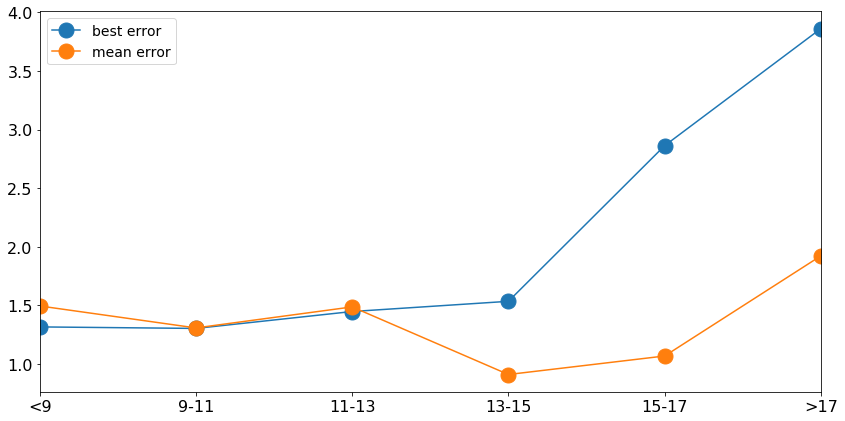

In [57]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra12 = pd.DataFrame({'mean error': mean5, 'best error': best5}, index=index)
ax = gra12.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 1 Ability

In [58]:
mg9 = mas[(mas.query_pb <= 9)]
mg11 = mas[(mas.query_pb > 9) & (mas.query_pb <= 11)]
mg13 = mas[(mas.query_pb > 11) & (mas.query_pb <= 13)]
mg15 = mas[(mas.query_pb > 13) & (mas.query_pb <= 15)]
mg17 = mas[(mas.query_pb > 15) & (mas.query_pb <= 17)]
mg19 = mas[(mas.query_pb > 17)]

### Bin counts

In [59]:
mg9count = mg9.shape[0]
mg11count = mg11.shape[0]
mg13count = mg13.shape[0]
mg15count = mg15.shape[0]
mg17count = mg17.shape[0]
mg19count = mg19.shape[0]

In [60]:
count3 = [mg9count, mg11count, mg13count, mg15count, mg17count, mg19count]

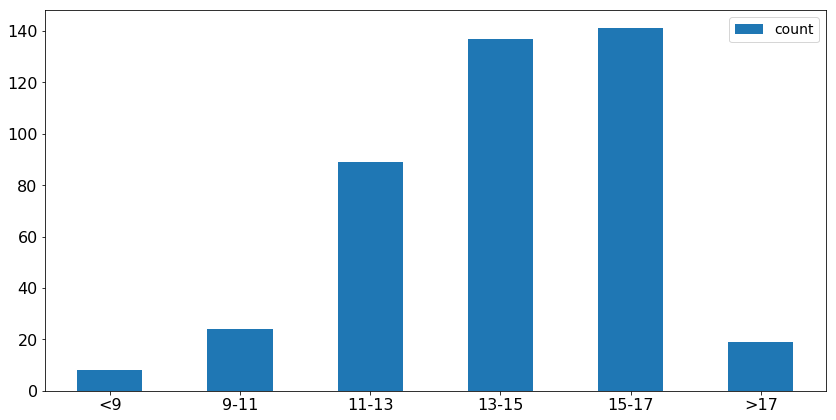

In [61]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [62]:


mg9B = sqrt(mean_squared_error(mg9.query_pb, mg9.best_pb_prediction))
mg9M = sqrt(mean_squared_error(mg9.query_pb, mg9.mean_pb_average_pace))

mg11B = sqrt(mean_squared_error(mg11.query_pb, mg11.best_pb_prediction))
mg11M = sqrt(mean_squared_error(mg11.query_pb, mg11.mean_pb_average_pace))

mg13B = sqrt(mean_squared_error(mg13.query_pb, mg13.best_pb_prediction))
mg13M = sqrt(mean_squared_error(mg13.query_pb, mg13.mean_pb_average_pace))

mg15B = sqrt(mean_squared_error(mg15.query_pb, mg15.best_pb_prediction))
mg15M = sqrt(mean_squared_error(mg15.query_pb, mg15.mean_pb_average_pace))

mg17B = sqrt(mean_squared_error(mg17.query_pb, mg17.best_pb_prediction))
mg17M = sqrt(mean_squared_error(mg17.query_pb, mg17.mean_pb_average_pace))

mg19B = sqrt(mean_squared_error(mg19.query_pb, mg19.best_pb_prediction))
mg19M = sqrt(mean_squared_error(mg19.query_pb, mg19.mean_pb_average_pace))


print('Mas U9 Best Error:', mg9B)
print('Mas U9 Mean Error:', mg9M)
print('Mas 9-11 Best Error:', mg11B)
print('Mas 9-11 Mean Error:', mg11M)
print('Mas 11-13 Best Error:', mg13B)
print('Mas 11-13 Mean Error:', mg13M)
print('Mas 13-15 Best Error:', mg15B)
print('Mas 13-15 Mean Error:', mg15M)
print('Mas 15-17 Best Error:', mg17B)
print('Mas 15-17 Mean Error:', mg17M)
print('Mas O17 Best Error:', mg19B)
print('Mas 017 Mean Error:', mg19M)

Mas U9 Best Error: 0.4295748095359509
Mas U9 Mean Error: 0.744085118477064
Mas 9-11 Best Error: 0.9376385790015639
Mas 9-11 Mean Error: 1.062476192734052
Mas 11-13 Best Error: 1.0456728370067434
Mas 11-13 Mean Error: 1.1227761231039328
Mas 13-15 Best Error: 1.3958967014668184
Mas 13-15 Mean Error: 1.0309781025308813
Mas 15-17 Best Error: 1.890013332610966
Mas 15-17 Mean Error: 0.8533020915811276
Mas O17 Best Error: 3.161699896592716
Mas 017 Mean Error: 1.6559210111932248


In [63]:
mean6 = [mg9M, mg11M, mg13M, mg15M, mg17M, mg19M]
best6 = [mg9B, mg11B, mg13B, mg15B, mg17B, mg19B]

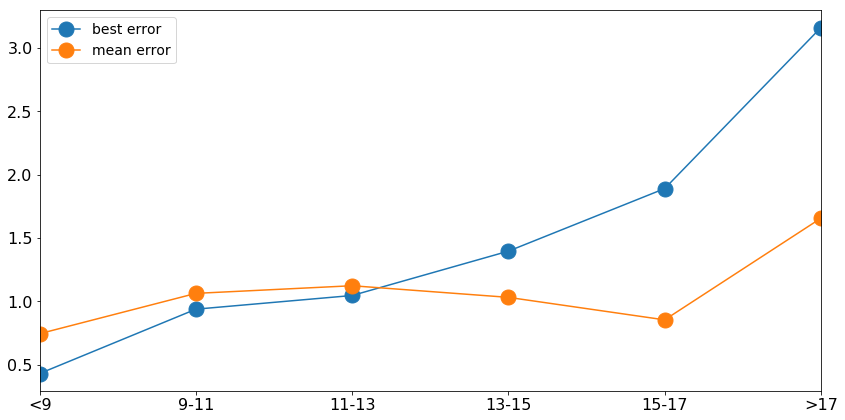

In [64]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra13 = pd.DataFrame({'mean error': mean6, 'best error': best6}, index=index)
ax = gra13.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 2 Ability

In [65]:
m2g9 = mas2[(mas2.query_pb <= 9)]
m2g11 = mas2[(mas2.query_pb > 9) & (mas2.query_pb <= 11)]
m2g13 = mas2[(mas2.query_pb > 11) & (mas2.query_pb <= 13)]
m2g15 = mas2[(mas2.query_pb > 13) & (mas2.query_pb <= 15)]
m2g17 = mas2[(mas2.query_pb > 15) & (mas2.query_pb <= 17)]
m2g19 = mas2[(mas2.query_pb > 17)]

### Bin counts

In [66]:
m2g9count = m2g9.shape[0]
m2g11count = m2g11.shape[0]
m2g13count = m2g13.shape[0]
m2g15count = m2g15.shape[0]
m2g17count = m2g17.shape[0]
m2g19count = m2g19.shape[0]

In [67]:
count3 = [m2g9count, m2g11count, m2g13count, m2g15count, m2g17count, m2g19count]

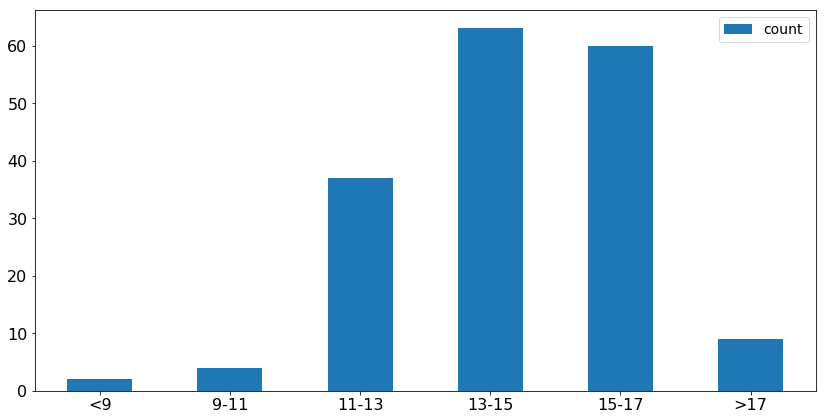

In [68]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [69]:


m2g9B = sqrt(mean_squared_error(m2g9.query_pb, m2g9.best_pb_prediction))
m2g9M = sqrt(mean_squared_error(m2g9.query_pb, m2g9.mean_pb_average_pace))

m2g11B = sqrt(mean_squared_error(m2g11.query_pb, m2g11.best_pb_prediction))
m2g11M = sqrt(mean_squared_error(m2g11.query_pb, m2g11.mean_pb_average_pace))

m2g13B = sqrt(mean_squared_error(m2g13.query_pb, m2g13.best_pb_prediction))
m2g13M = sqrt(mean_squared_error(m2g13.query_pb, m2g13.mean_pb_average_pace))

m2g15B = sqrt(mean_squared_error(m2g15.query_pb, m2g15.best_pb_prediction))
m2g15M = sqrt(mean_squared_error(m2g15.query_pb, m2g15.mean_pb_average_pace))

m2g17B = sqrt(mean_squared_error(m2g17.query_pb, m2g17.best_pb_prediction))
m2g17M = sqrt(mean_squared_error(m2g17.query_pb, m2g17.mean_pb_average_pace))

m2g19B = sqrt(mean_squared_error(m2g19.query_pb, m2g19.best_pb_prediction))
m2g19M = sqrt(mean_squared_error(m2g19.query_pb, m2g19.mean_pb_average_pace))


print('Mas2 U9 Best Error:', m2g9B)
print('Mas2 U9 Mean Error:', m2g9M)
print('Mas2 9-11 Best Error:', m2g11B)
print('Mas2 9-11 Mean Error:', m2g11M)
print('Mas2 11-13 Best Error:', m2g13B)
print('Mas2 11-13 Mean Error:', m2g13M)
print('Mas2 13-15 Best Error:', m2g15B)
print('Mas2 13-15 Mean Error:', m2g15M)
print('Mas2 15-17 Best Error:', m2g17B)
print('Mas2 15-17 Mean Error:', m2g17M)
print('Mas2 O17 Best Error:', m2g19B)
print('Mas2 017 Mean Error:', m2g19M)

Mas2 U9 Best Error: 0.13101051304679656
Mas2 U9 Mean Error: 0.0
Mas2 9-11 Best Error: 1.6462268955411061
Mas2 9-11 Mean Error: 1.8479162489469652
Mas2 11-13 Best Error: 1.1297189258189084
Mas2 11-13 Mean Error: 1.3573004249072818
Mas2 13-15 Best Error: 1.682990600656698
Mas2 13-15 Mean Error: 0.9072409161478392
Mas2 15-17 Best Error: 1.969921261301913
Mas2 15-17 Mean Error: 0.960939352913153
Mas2 O17 Best Error: 3.0581367474596304
Mas2 017 Mean Error: 2.0078231619268134


In [70]:
mean7 = [m2g9M, m2g11M, m2g13M, m2g15M, m2g17M, m2g19M]
best7 = [m2g9B, m2g11B, m2g13B, m2g15B, m2g17B, m2g19B]

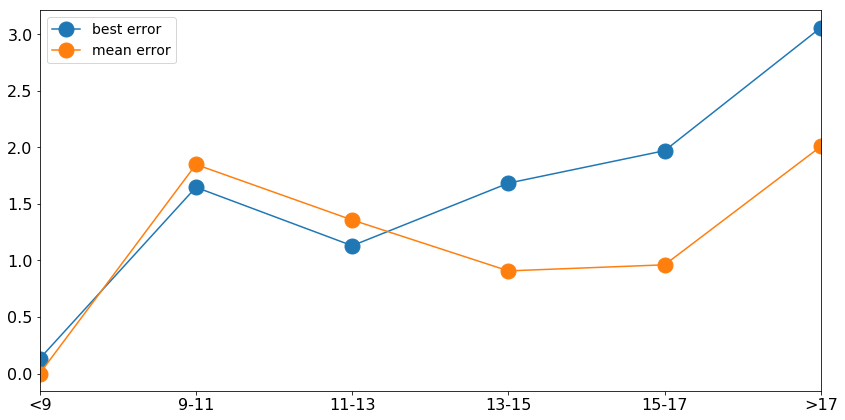

In [71]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra14 = pd.DataFrame({'mean error': mean7, 'best error': best7}, index=index)
ax = gra14.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 3 Ability

In [72]:
m3g9 = mas3[(mas3.query_pb <= 9)]
m3g11 = mas3[(mas3.query_pb > 9) & (mas3.query_pb <= 11)]
m3g13 = mas3[(mas3.query_pb > 11) & (mas3.query_pb <= 13)]
m3g15 = mas3[(mas3.query_pb > 13) & (mas3.query_pb <= 15)]
m3g17 = mas3[(mas3.query_pb > 15) & (mas3.query_pb <= 17)]
m3g19 = mas3[(mas3.query_pb > 17)]

### Bin counts

In [73]:
m3g9count = m3g9.shape[0]
m3g11count = m3g11.shape[0]
m3g13count = m3g13.shape[0]
m3g15count = m3g15.shape[0]
m3g17count = m3g17.shape[0]
m3g19count = m3g19.shape[0]

In [74]:
count4 = [m3g9count, m3g11count, m3g13count, m3g15count, m3g17count, m3g19count]

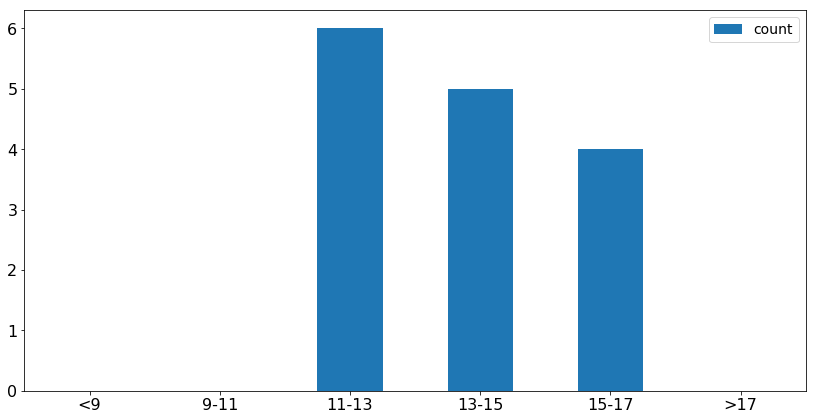

In [75]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count4}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [76]:


#m3g9B = sqrt(mean_squared_error(m3g9.query_pb, m3g9.best_pb_prediction))
#m3g9M = sqrt(mean_squared_error(m3g9.query_pb, m3g9.mean_pb_average_pace))

#m3g11B = sqrt(mean_squared_error(m3g11.query_pb, m3g11.best_pb_prediction))
#m3g11M = sqrt(mean_squared_error(m3g11.query_pb, m3g11.mean_pb_average_pace))

m3g13B = sqrt(mean_squared_error(m3g13.query_pb, m3g13.best_pb_prediction))
m3g13M = sqrt(mean_squared_error(m3g13.query_pb, m3g13.mean_pb_average_pace))

m3g15B = sqrt(mean_squared_error(m3g15.query_pb, m3g15.best_pb_prediction))
m3g15M = sqrt(mean_squared_error(m3g15.query_pb, m3g15.mean_pb_average_pace))

m3g17B = sqrt(mean_squared_error(m3g17.query_pb, m3g17.best_pb_prediction))
m3g17M = sqrt(mean_squared_error(m3g17.query_pb, m3g17.mean_pb_average_pace))

#m3g19B = sqrt(mean_squared_error(m3g19.query_pb, m3g19.best_pb_prediction))
#m3g19M = sqrt(mean_squared_error(m3g19.query_pb, m3g19.mean_pb_average_pace))


#print('Mas3 U9 Best Error:', m3g9B)
#print('Mas3 U9 Mean Error:', m3g9M)
#print('Mas3 9-11 Best Error:', m3g11B)
#print('Mas3 9-11 Mean Error:', m3g11M)
print('Mas3 11-13 Best Error:', m3g13B)
print('Mas3 11-13 Mean Error:', m3g13M)
print('Mas3 13-15 Best Error:', m3g15B)
print('Mas3 13-15 Mean Error:', m3g15M)
print('Mas3 15-17 Best Error:', m3g17B)
print('Mas3 15-17 Mean Error:', m3g17M)
#print('Mas3 O17 Best Error:', m3g19B)
#print('Mas3 017 Mean Error:', m3g19M)

Mas3 11-13 Best Error: 0.6444084652755577
Mas3 11-13 Mean Error: 0.8533927866701606
Mas3 13-15 Best Error: 0.910529572782668
Mas3 13-15 Mean Error: 0.7562046533831812
Mas3 15-17 Best Error: 1.3612861667226779
Mas3 15-17 Mean Error: 0.7261982128917748


In [77]:
mean8 = [m3g13M, m3g15M, m3g17M]
best8 = [m3g13B, m3g15B, m3g17B]

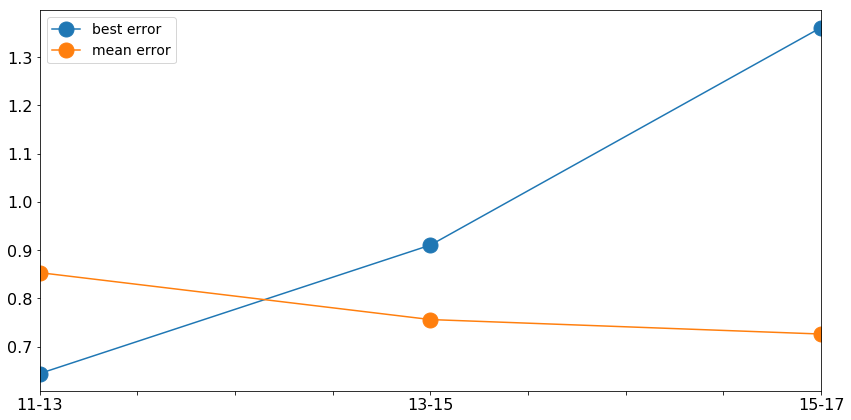

In [78]:
index = ['11-13', '13-15', '15-17']
gra15 = pd.DataFrame({'mean error': mean8, 'best error': best8}, index=index)
ax = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 1 Ability

In [79]:
w1g9 = wom1[(wom1.query_pb <= 9)]
w1g11 = wom1[(wom1.query_pb > 9) & (wom1.query_pb <= 11)]
w1g13 = wom1[(wom1.query_pb > 11) & (wom1.query_pb <= 13)]
w1g15 = wom1[(wom1.query_pb > 13) & (wom1.query_pb <= 15)]
w1g17 = wom1[(wom1.query_pb > 15) & (wom1.query_pb <= 17)]
w1g19 = wom1[(wom1.query_pb > 17)]

### Bin counts

In [80]:
w1g9count = w1g9.shape[0]
w1g11count = w1g11.shape[0]
w1g13count = w1g13.shape[0]
w1g15count = w1g15.shape[0]
w1g17count = w1g17.shape[0]
w1g19count = w1g19.shape[0]

In [81]:
count5 = [w1g9count, w1g11count, w1g13count, w1g15count, w1g17count, w1g19count]

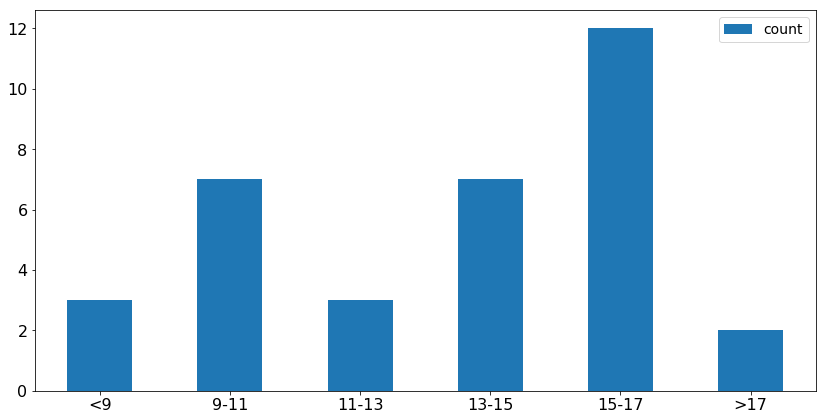

In [82]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count5}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [83]:

w1g9B = sqrt(mean_squared_error(w1g9.query_pb, w1g9.best_pb_prediction))
w1g9M = sqrt(mean_squared_error(w1g9.query_pb, w1g9.mean_pb_average_pace))

w1g11B = sqrt(mean_squared_error(w1g11.query_pb, w1g11.best_pb_prediction))
w1g11M = sqrt(mean_squared_error(w1g11.query_pb, w1g11.mean_pb_average_pace))

w1g13B = sqrt(mean_squared_error(w1g13.query_pb, w1g13.best_pb_prediction))
w1g13M = sqrt(mean_squared_error(w1g13.query_pb, w1g13.mean_pb_average_pace))

w1g15B = sqrt(mean_squared_error(w1g15.query_pb, w1g15.best_pb_prediction))
w1g15M = sqrt(mean_squared_error(w1g15.query_pb, w1g15.mean_pb_average_pace))

w1g17B = sqrt(mean_squared_error(w1g17.query_pb, w1g17.best_pb_prediction))
w1g17M = sqrt(mean_squared_error(w1g17.query_pb, w1g17.mean_pb_average_pace))

w1g19B = sqrt(mean_squared_error(w1g19.query_pb, w1g19.best_pb_prediction))
w1g19M = sqrt(mean_squared_error(w1g19.query_pb, w1g19.mean_pb_average_pace))


print('Wom1 U9 Best Error:', w1g9B)
print('Wom1 U9 Mean Error:', w1g9M)
print('Wom1 9-11 Best Error:', w1g11B)
print('Wom1 9-11 Mean Error:', w1g11M)
print('Wom1 11-13 Best Error:', w1g13B)
print('Wom1 11-13 Mean Error:', w1g13M)
print('Wom1 13-15 Best Error:', w1g15B)
print('Wom1 13-15 Mean Error:', w1g15M)
print('Wom1 15-17 Best Error:', w1g17B)
print('Wom1 15-17 Mean Error:', w1g17M)
print('Wom1 O17 Best Error:', w1g19B)
print('Wom1 017 Mean Error:', w1g19M)

Wom1 U9 Best Error: 0.6116764125315749
Wom1 U9 Mean Error: 1.0757691850308222
Wom1 9-11 Best Error: 1.1876235509614481
Wom1 9-11 Mean Error: 1.081725238338325
Wom1 11-13 Best Error: 2.0791268922038864
Wom1 11-13 Mean Error: 1.078889773166213
Wom1 13-15 Best Error: 0.9244946724704866
Wom1 13-15 Mean Error: 1.1287560617466328
Wom1 15-17 Best Error: 1.115319356907348
Wom1 15-17 Mean Error: 0.6709432754937391
Wom1 O17 Best Error: 1.896526013947159
Wom1 017 Mean Error: 1.4045172352369113


In [84]:
mean9 = [w1g9M, w1g11M, w1g13M, w1g15M, w1g17M, w1g19M]
best9 = [w1g9B, w1g11B, w1g13B, w1g15B, w1g17B, w1g19B]

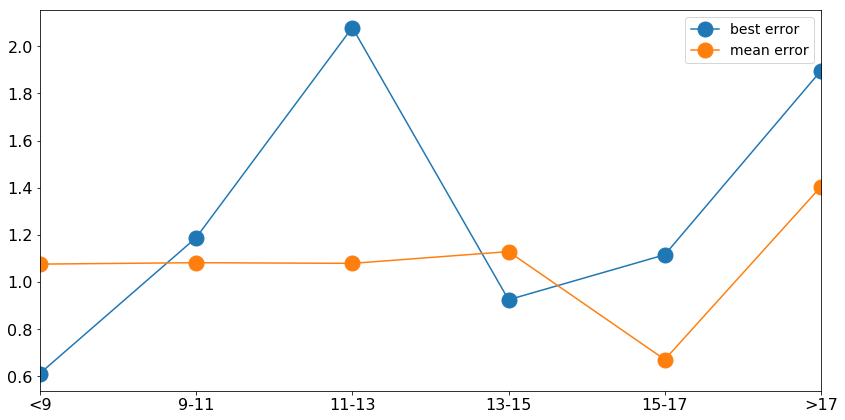

In [85]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra16 = pd.DataFrame({'mean error': mean9, 'best error': best9}, index=index)
ax = gra16.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 2 Ability

In [86]:
w2g9 = wom2[(wom2.query_pb <= 9)]
w2g11 = wom2[(wom2.query_pb > 9) & (wom2.query_pb <= 11)]
w2g13 = wom2[(wom2.query_pb > 11) & (wom2.query_pb <= 13)]
w2g15 = wom2[(wom2.query_pb > 13) & (wom2.query_pb <= 15)]
w2g17 = wom2[(wom2.query_pb > 15) & (wom2.query_pb <= 17)]
w2g19 = wom2[(wom2.query_pb > 17)]

### Bin counts

In [87]:
w2g9count = w2g9.shape[0]
w2g11count = w2g11.shape[0]
w2g13count = w2g13.shape[0]
w2g15count = w2g15.shape[0]
w2g17count = w2g17.shape[0]
w2g19count = w2g19.shape[0]

In [88]:
count6 = [w2g9count, w2g11count, w2g13count, w2g15count, w2g17count, w2g19count]

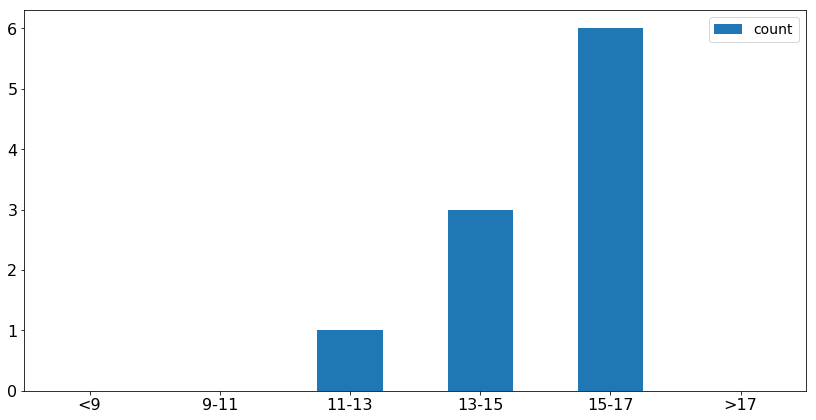

In [89]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count6}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [91]:


#w2g9B = sqrt(mean_squared_error(w2g9.query_pb, w2g9.best_pb_prediction))
#w2g9M = sqrt(mean_squared_error(w2g9.query_pb, w2g9.mean_pb_average_pace))

#w2g11B = sqrt(mean_squared_error(w2g11.query_pb, w2g11.best_pb_prediction))
#w2g11M = sqrt(mean_squared_error(w2g11.query_pb, w2g11.mean_pb_average_pace))

#w2g13B = sqrt(mean_squared_error(w2g13.query_pb, w2g13.best_pb_prediction))
#w2g13M = sqrt(mean_squared_error(w2g13.query_pb, w2g13.mean_pb_average_pace))

w2g15B = sqrt(mean_squared_error(w2g15.query_pb, w2g15.best_pb_prediction))
w2g15M = sqrt(mean_squared_error(w2g15.query_pb, w2g15.mean_pb_average_pace))

w2g17B = sqrt(mean_squared_error(w2g17.query_pb, w2g17.best_pb_prediction))
w2g17M = sqrt(mean_squared_error(w2g17.query_pb, w2g17.mean_pb_average_pace))

# w2g19B = sqrt(mean_squared_error(w2g19.query_pb, w2g19.best_pb_prediction))
# w2g19M = sqrt(mean_squared_error(w2g19.query_pb, w2g19.mean_pb_average_pace))


#print('Wom2 U9 Best Error:', w2g9B)
#print('Wom2 U9 Mean Error:', w2g9M)
#print('Wom2 9-11 Best Error:', w2g11B)
#print('Wom2 9-11 Mean Error:', w2g11M)
#print('Wom2 11-13 Best Error:', w2g13B)
#print('Wom2 11-13 Mean Error:', w2g13M)
print('Wom2 13-15 Best Error:', w2g15B)
print('Wom2 13-15 Mean Error:', w2g15M)
print('Wom2 15-17 Best Error:', w2g17B)
print('Wom2 15-17 Mean Error:', w2g17M)
# print('Wom2 O17 Best Error:', w2g19B)
# print('Wom2 017 Mean Error:', w2g19M)

Wom2 13-15 Best Error: 0.682404806707357
Wom2 13-15 Mean Error: 0.9605897973526802
Wom2 15-17 Best Error: 2.914423670682809
Wom2 15-17 Mean Error: 1.1227883881907095


In [92]:
mean10 = [w2g15M, w2g17M]
best10 = [w2g15B, w2g17B]

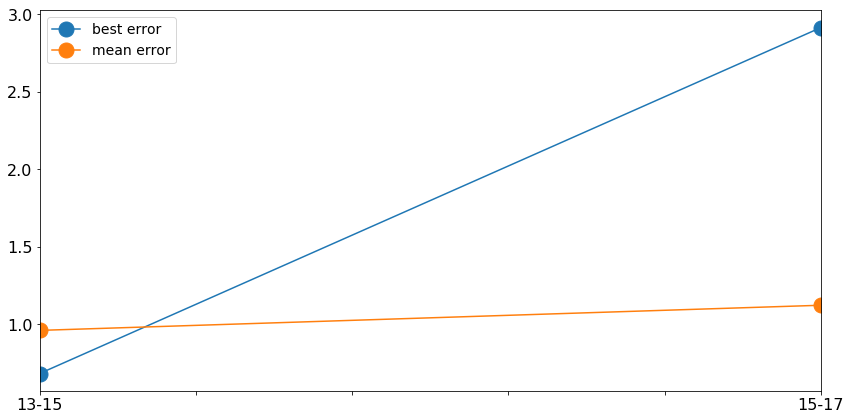

In [94]:
index = ['13-15', '15-17']
gra18 = pd.DataFrame({'mean error': mean10, 'best error': best10}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Senior Women Ability

In [95]:
sw9 = senW[(senW.query_pb <= 9)]
sw11 = senW[(senW.query_pb > 9) & (senW.query_pb <= 11)]
sw13 = senW[(senW.query_pb > 11) & (senW.query_pb <= 13)]
sw15 = senW[(senW.query_pb > 13) & (senW.query_pb <= 15)]
sw17 = senW[(senW.query_pb > 15) & (senW.query_pb <= 17)]
sw19 = senW[(senW.query_pb > 17)]

### Bin counts

In [96]:
sw9count = sw9.shape[0]
sw11count = sw11.shape[0]
sw13count = sw13.shape[0]
sw15count = sw15.shape[0]
sw17count = sw17.shape[0]
sw19count = sw19.shape[0]

In [97]:
count7 = [sw9count, sw11count, sw13count, sw15count, sw17count, sw19count]

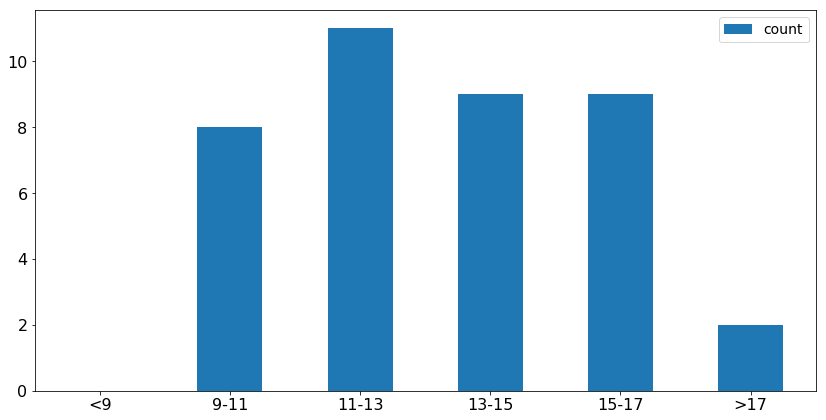

In [98]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count7}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [102]:


# sw9B = sqrt(mean_squared_error(sw9.query_pb, sw9.best_pb_prediction))
# sw9M = sqrt(mean_squared_error(sw9.query_pb, sw9.mean_pb_average_pace))

sw11B = sqrt(mean_squared_error(sw11.query_pb, sw11.best_pb_prediction))
sw11M = sqrt(mean_squared_error(sw11.query_pb, sw11.mean_pb_average_pace))

sw13B = sqrt(mean_squared_error(sw13.query_pb, sw13.best_pb_prediction))
sw13M = sqrt(mean_squared_error(sw13.query_pb, sw13.mean_pb_average_pace))

sw15B = sqrt(mean_squared_error(sw15.query_pb, sw15.best_pb_prediction))
sw15M = sqrt(mean_squared_error(sw15.query_pb, sw15.mean_pb_average_pace))

sw17B = sqrt(mean_squared_error(sw17.query_pb, sw17.best_pb_prediction))
sw17M = sqrt(mean_squared_error(sw17.query_pb, sw17.mean_pb_average_pace))

sw19B = sqrt(mean_squared_error(sw19.query_pb, sw19.best_pb_prediction))
sw19M = sqrt(mean_squared_error(sw19.query_pb, sw19.mean_pb_average_pace))



print('Senior Women 9-11 Best Error:', sw11B)
print('Senior Women 9-11 Mean Error:', sw11M)
print('Senior Women 11-13 Best Error:', sw13B)
print('Senior Women 11-13 Mean Error:', sw13M)
print('Senior Women 13-15 Best Error:', sw15B)
print('Senior Women 13-15 Mean Error:', sw15M)
print('Senior Women 15-17 Best Error:', sw17B)
print('Senior Women 15-17 Mean Error:', sw17M)
print('Senior Women O17 Best Error:', sw19B)
print('Senior Women 017 Mean Error:', sw19M)

Senior Women 9-11 Best Error: 0.7426902612287315
Senior Women 9-11 Mean Error: 0.8979156103331898
Senior Women 11-13 Best Error: 1.4312692704612626
Senior Women 11-13 Mean Error: 1.4086616963707805
Senior Women 13-15 Best Error: 1.9068255389707744
Senior Women 13-15 Mean Error: 0.965308901221027
Senior Women 15-17 Best Error: 1.9964751523236743
Senior Women 15-17 Mean Error: 0.8698614982770109
Senior Women O17 Best Error: 2.4632019726177736
Senior Women 017 Mean Error: 1.5165478080495147


In [103]:
mean11 = [sw11M, sw13M, sw15M, sw17M, sw19M]
best11 = [sw11B, sw13B, sw15B, sw17B, sw19B]

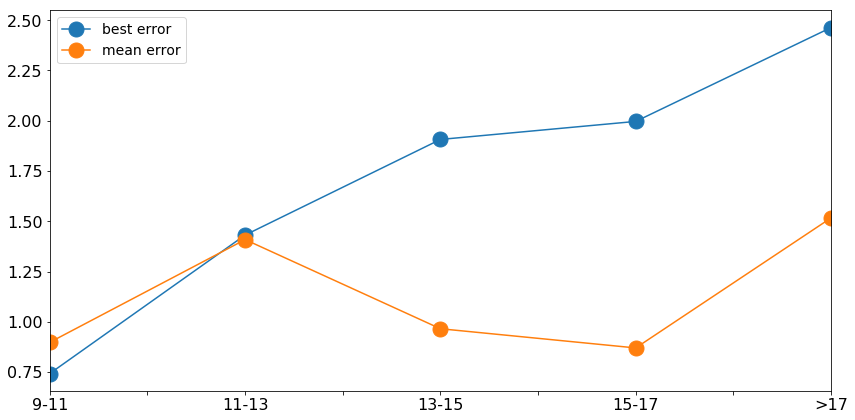

In [104]:
index = [ '9-11', '11-13', '13-15', '15-17', '>17']
gra18 = pd.DataFrame({'mean error': mean11, 'best error': best11}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Youth Men Ability

In [105]:
you9 = you[(you.query_pb <= 9)]
you11 = you[(you.query_pb > 9) & (you.query_pb <= 11)]
you13 = you[(you.query_pb > 11) & (you.query_pb <= 13)]
you15 = you[(you.query_pb > 13) & (you.query_pb <= 15)]
you17 = you[(you.query_pb > 15) & (you.query_pb <= 17)]
you19 = you[(you.query_pb > 17)]

### Bin counts

In [106]:
you9count = you9.shape[0]
you11count = you11.shape[0]
you13count = you13.shape[0]
you15count = you15.shape[0]
you17count = you17.shape[0]
you19count = you19.shape[0]

In [107]:
count8 = [you9count, you11count, you13count, you15count, you17count, you19count]

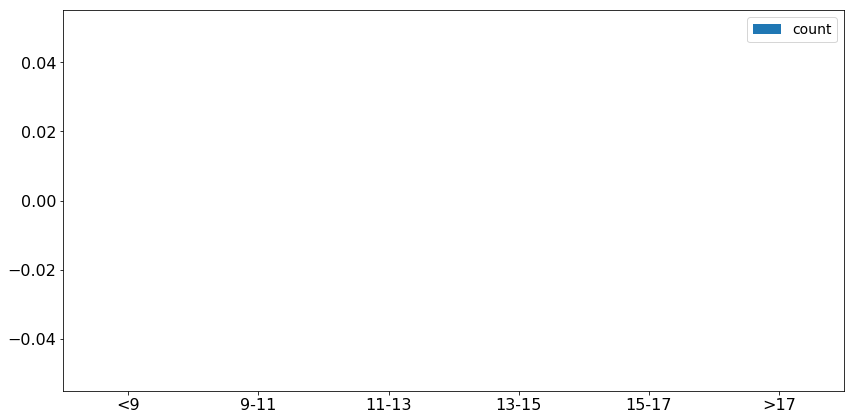

In [108]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count8}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

# Age Ability

In [110]:
frames = [sg9, sw9]
frames1 = [sg11, sw11]
frames2 = [sg13, sw13]
frames3 = [sg15, sw15]
frames4 = [sg17, sw17]
frames5 = [sg19, sw19]

## 23-39 year old Ability

In [111]:
ageS9 = pd.concat(frames)
ageS11 = pd.concat(frames1)
ageS13 = pd.concat(frames2)
ageS15 = pd.concat(frames3)
ageS17 = pd.concat(frames4)
ageS19 = pd.concat(frames5)

### Bin counts

In [112]:
ageS9count = ageS9.shape[0]
ageS11count = ageS11.shape[0]
ageS13count = ageS13.shape[0]
ageS15count = ageS15.shape[0]
ageS17count = ageS17.shape[0]
ageS19count = ageS19.shape[0]

In [113]:
count_age = [ageS9count, ageS11count, ageS13count, ageS15count, ageS17count, ageS19count]

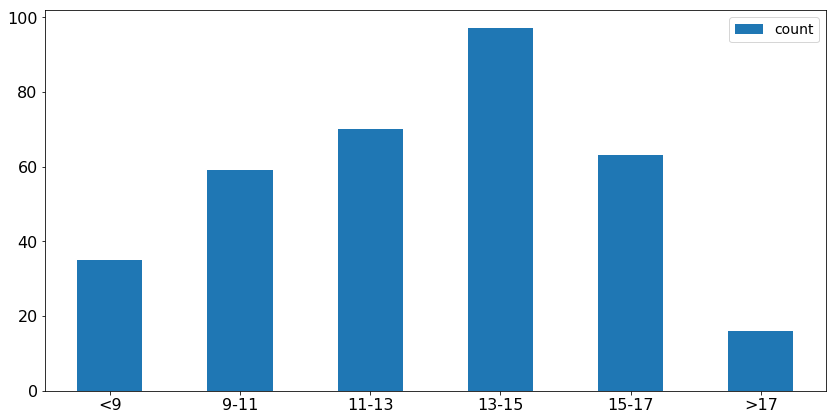

In [114]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count_age}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [115]:

ageS9B = sqrt(mean_squared_error(ageS9.query_pb, ageS9.best_pb_prediction))
ageS9M = sqrt(mean_squared_error(ageS9.query_pb, ageS9.mean_pb_average_pace))

ageS11B = sqrt(mean_squared_error(ageS11.query_pb, ageS11.best_pb_prediction))
ageS11M = sqrt(mean_squared_error(ageS11.query_pb, ageS11.mean_pb_average_pace))

ageS13B = sqrt(mean_squared_error(ageS13.query_pb, ageS13.best_pb_prediction))
ageS13M = sqrt(mean_squared_error(ageS13.query_pb, ageS13.mean_pb_average_pace))

ageS15B = sqrt(mean_squared_error(ageS15.query_pb, ageS15.best_pb_prediction))
ageS15M = sqrt(mean_squared_error(ageS15.query_pb, ageS15.mean_pb_average_pace))

ageS17B = sqrt(mean_squared_error(ageS17.query_pb, ageS17.best_pb_prediction))
ageS17M = sqrt(mean_squared_error(ageS17.query_pb, ageS17.mean_pb_average_pace))

ageS19B = sqrt(mean_squared_error(ageS19.query_pb, ageS19.best_pb_prediction))
ageS19M = sqrt(mean_squared_error(ageS19.query_pb, ageS19.mean_pb_average_pace))


print('Aged 23-39 U9 Best Error:', ageS9B)
print('Aged 23-39 U9 Mean Error:', ageS9M)
print('Aged 23-39 9-11 Best Error:', ageS11B)
print('Aged 23-39 9-11 Mean Error:', ageS11M)
print('Aged 23-39 11-13 Best Error:', ageS13B)
print('Aged 23-39 11-13 Mean Error:', ageS13M)
print('Aged 23-39 13-15 Best Error:', ageS15B)
print('Aged 23-39 13-15 Mean Error:', ageS15M)
print('Aged 23-39 15-17 Best Error:', ageS17B)
print('Aged 23-39 15-17 Mean Error:', ageS17M)
print('Aged 23-39 O17 Best Error:', ageS19B)
print('Aged 23-39 017 Mean Error:', ageS19M)

Aged 23-39 U9 Best Error: 1.3162168250317576
Aged 23-39 U9 Mean Error: 1.4950056469736044
Aged 23-39 9-11 Best Error: 1.242227347525585
Aged 23-39 9-11 Mean Error: 1.2598068483684428
Aged 23-39 11-13 Best Error: 1.4450510592229127
Aged 23-39 11-13 Mean Error: 1.474937421944765
Aged 23-39 13-15 Best Error: 1.5728718076918318
Aged 23-39 13-15 Mean Error: 0.9153451174844899
Aged 23-39 15-17 Best Error: 2.7558147453842956
Aged 23-39 15-17 Mean Error: 1.041965575802353
Aged 23-39 O17 Best Error: 3.716095033387978
Aged 23-39 017 Mean Error: 1.8767956699020136


In [116]:
mean_age = [ageS9M, ageS11M, ageS13M, ageS15M, ageS17M, ageS19M]
best_age = [ageS9B, ageS11B, ageS13B, ageS15B, ageS17B, ageS19B]

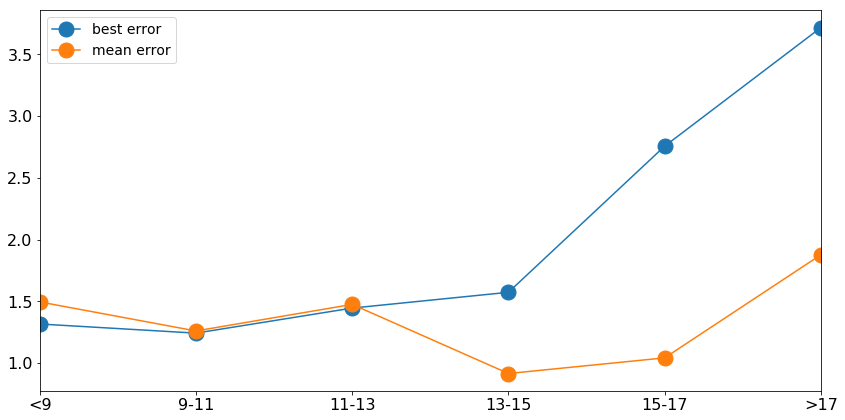

In [117]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ag = pd.DataFrame({'mean error': mean_age, 'best error': best_age}, index=index)
ax = ag.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# AGE

In [118]:
g23 = [sen, senW]
g40 = [mas, wom1]
g50 = [mas2, wom2]
g60 = mas3
g20 = you

In [119]:
g23 = pd.concat(g23)
g40 = pd.concat(g40)
g50 = pd.concat(g50)

In [120]:
g23count = g23.shape[0]
g40count = g40.shape[0]
g50count = g50.shape[0]
g60count = g60.shape[0]
g20count = g20.shape[0]

In [121]:
count_G = [g20count, g23count, g40count, g50count, g60count]

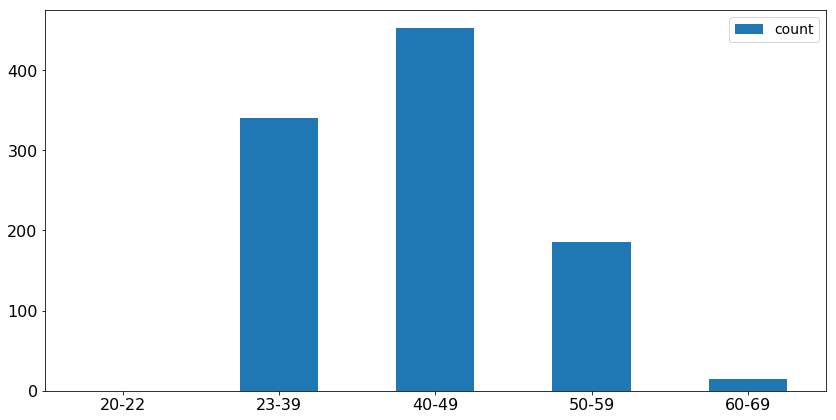

In [122]:
index = ['20-22', '23-39', '40-49', '50-59', '60-69']
ct = pd.DataFrame({'count': count_G}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [123]:


g23B = sqrt(mean_squared_error(g23.query_pb, g23.best_pb_prediction))
g23M = sqrt(mean_squared_error(g23.query_pb, g23.mean_pb_average_pace))

g40B = sqrt(mean_squared_error(g40.query_pb, g40.best_pb_prediction))
g40M = sqrt(mean_squared_error(g40.query_pb, g40.mean_pb_average_pace))

g50B = sqrt(mean_squared_error(g50.query_pb, g50.best_pb_prediction))
g50M = sqrt(mean_squared_error(g50.query_pb, g50.mean_pb_average_pace))

g60B = sqrt(mean_squared_error(g60.query_pb, g60.best_pb_prediction))
g60M = sqrt(mean_squared_error(g60.query_pb, g60.mean_pb_average_pace))


print('23-39 Best Error:', g23B)
print('23-39 Mean Error:', g23M)
print('40-49 Best Error:', g40B)
print('40-49 Mean Error:', g40M)
print('50-59 Best Error:', g50B)
print('50-59 Mean Error:', g50M)
print('60-69 Best Error:', g60B)
print('60-69 Mean Error:', g60M)

23-39 Best Error: 1.9075905996039153
23-39 Mean Error: 1.2487352199856085
40-49 Best Error: 1.5828948416180129
40-49 Mean Error: 1.0278453986511331
50-59 Best Error: 1.8312911437005064
50-59 Mean Error: 1.15991450123781
60-69 Best Error: 0.9677911016369123
60-69 Mean Error: 0.789022950940579


In [124]:
mean_A = [g23M, g40M, g50M, g60M]
best_A = [g23B, g40B, g50B, g60B]

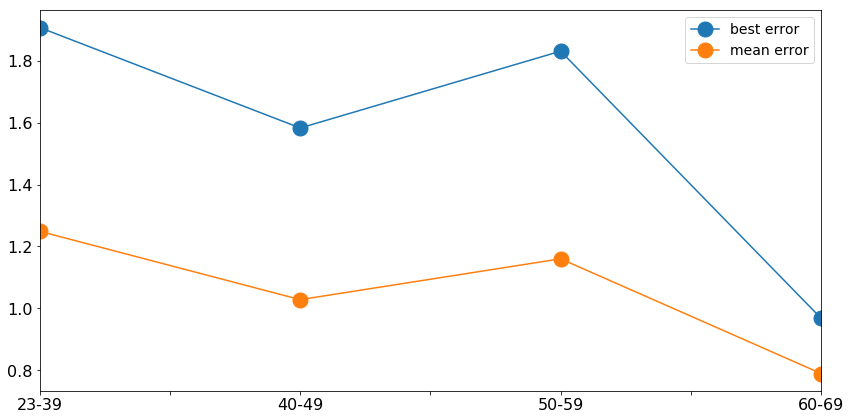

In [125]:
index = ['23-39', '40-49', '50-59', '60-69']
ageG = pd.DataFrame({'mean error': mean_A, 'best error': best_A}, index=index)
ax = ageG.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)